In [7]:
%pip install pandas
%pip install seaborn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 10.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 13.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import widgets, Layout
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv('./data/3_lekce_houses_train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 1. Identifikace chybějících hodnot --> df.isna().sum()
**Zadání:**
Napište funkci, která najde chybějící hodnoty v datasetu a vypíše, kolik chybějících hodnot je v každém sloupci.

In [3]:
def null_values_count(df):
    return df.isna().sum().reset_index()

In [4]:
null_values_count(data)

,index,0
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
...,...,...
76,MoSold,0
77,YrSold,0
78,SaleType,0
79,SaleCondition,0


## Řešení níže

In [5]:
def missing_values(df):
    missing_count = df.isna().sum()
    return(missing_count)

In [6]:
missing_values(data)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

##### Řešení 2.0 (přidané věci navíc)

In [11]:
def get_detailed_missing_data_analysis(data, include_all_columns=False):
    missing_count = data.isna().sum()
    unique_values_count = data.nunique()
    total_rows = data.shape[0]

    analysis_df = pd.DataFrame({
        'missing_count': missing_count,
        'missing_percentage': (missing_count / total_rows) * 100,
        'unique_values_count': unique_values_count,
        'unique_values_percentage': (unique_values_count / total_rows) * 100
    })

    if not include_all_columns:
        analysis_df = analysis_df[analysis_df['missing_count'] > 0]

    analysis_df.sort_values(by='missing_percentage', ascending=False, inplace=True)
    return analysis_df

def visualize_missing_data(include_all_columns=False):
    detailed_missing_data_df = get_detailed_missing_data_analysis(data, include_all_columns)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(detailed_missing_data_df, annot=True, cmap='coolwarm', fmt='.1f')
    plt.title('Detailní analýza chybějících hodnot')
    plt.show()

    display(detailed_missing_data_df)

# Interaktivní widget
checkbox = widgets.Checkbox(value=False, description='Zahrnout všechny sloupce')
widgets.interact(visualize_missing_data, include_all_columns=checkbox)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.visualize_missing_data(include_all_columns=False)>

## 2. Řešení chybějících hodnot
**a) Identifikace numerických sloupců**

**Zadání:**
- Napište funkci, která identifikuje všechny numerické sloupce v datasetu.

**Vysvětlení:**
- Vysvětlíme, proč je důležité vědět, které sloupce jsou numerické (např. pro náhradu chybějících hodnot nebo standardizaci).
- Ukážeme, jak používat metodu `select_dtypes()` v pandas.

souhrnně: 
- všechny numerické =np. number
- všechny textové = object

In [12]:
def numeric_columns(data):
    return [column_name for column_name in data.select_dtypes(include=np.number).columns]

In [13]:
numeric_columns = numeric_columns(data)

## Řešení níže

In [10]:
def get_numeric_columns(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    return numeric_columns

In [11]:
numeric_columns = get_numeric_columns(data)
print("Numerické sloupce:", numeric_columns)

Numerické sloupce: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


**b) Náhrada chybějících hodnot průměrem**

**Zadání:**
- Napište funkci, která nahradí chybějící hodnoty ve všech numerických sloupcích průměrem těchto sloupců.

**Vysvětlení:**
- Ukážeme, jak používat metodu `fillna()` v pandas s již identifikovanými numerickými sloupci.

In [12]:
def isnull_replace(df):
    for column in numeric_columns:
        df[column].fillna(df[column].mean(), inplace=True)
    return df

In [13]:
isnull_replace(data)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Řešení níže

In [14]:
def replace_missing_with_mean(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        df[column].fillna(df[column].mean(), inplace=True)
    return df

In [15]:
replace_missing_with_mean(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
missing_values(data)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

**c) Imputace pomocí lineární regrese**

**Zadání:**
- Napište funkci, která nahradí chybějící hodnoty pomocí lineární regrese.

### Imputace pomocí lineární regrese
Regresní imputace využívá vztahů mezi proměnnými k předpovědi chybějících hodnot.
- zde vybrány náhodné dva sloupce, v realitě je vhodné nejprve udělat korelačními matici a vybrat sloupce korelované s vysvětlovanou proměnnou

## Řešení níže

In [31]:
def impute_with_regression(df, target_column, feature_columns):
    # Vytvoříme trénovací data bez chybějících hodnot
    train_data = df.dropna(subset=[target_column])
    
    # Vytvoříme lineární model a natrénujeme ho na trénovacích datech
    model = LinearRegression().fit(train_data[feature_columns], train_data[target_column])
    
    # Najdeme chybějící hodnoty v cílovém sloupci
    missing_data = df[df[target_column].isnull()]
    
    # Předpovíme chybějící hodnoty a nahradíme je v původním datasetu
    df.loc[df[target_column].isnull(), target_column] = model.predict(missing_data[feature_columns])
    
    return df

In [28]:
po_regresi = impute_with_regression(data, 'LotFrontage', ['LotArea', 'OverallQual'])
po_regresi

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [32]:
# Kontrola, zda sloupec 'LotFrontage' obsahuje chybějící hodnoty
print(f"Počet chybějících hodnot v 'LotFrontage': {data['LotFrontage'].isnull().sum()}")

# Výpočet korelace mezi všemi numerickými sloupci
correlation_matrix = data.corr()

# Zobrazení korelační matice
print(correlation_matrix)

# Výběr sloupců s vysokou korelací s 'LotFrontage'
target_column = 'LotFrontage'
correlations = correlation_matrix[target_column].drop(target_column)
print("Korelace s 'LotFrontage':\n", correlations)

# Výběr sloupců s korelací nad 0.5 nebo pod -0.5
high_correlation_columns = correlations[(correlations > 0.3) | (correlations < -0.3)].index.tolist()
print("Vybrané sloupce pro regresní imputaci:", high_correlation_columns)

# Funkce pro regresní imputaci
def impute_with_regression(df, target_column, feature_columns):
    # Vytvoříme trénovací data bez chybějících hodnot v cílovém sloupci
    train_data = df.dropna(subset=[target_column])
    
    # Kontrola, zda existují dostatečná data pro trénování modelu
    if train_data.shape[0] == 0:
        raise ValueError("Neexistují dostatečná data pro trénování modelu.")
    
    # Vytvoříme a natrénujeme lineární model
    model = LinearRegression().fit(train_data[feature_columns], train_data[target_column])
    
    # Najdeme chybějící hodnoty v cílovém sloupci
    missing_data = df[df[target_column].isnull()]
    
    # Kontrola, zda existují dostatečná data pro předpověď
    if missing_data.shape[0] == 0:
        raise ValueError("Neexistují dostatečná data pro předpověď chybějících hodnot.")
    
    # Předpovíme chybějící hodnoty a nahradíme je v původním datasetu
    df.loc[df[target_column].isnull(), target_column] = model.predict(missing_data[feature_columns])
    
    return df



Počet chybějících hodnot v 'LotFrontage': 259
                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.00

/tmp/ipykernel_196/561354475.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [33]:
# Použití funkce pro regresní imputaci s vybranými sloupci
impute_with_regression(data, 'LotFrontage', high_correlation_columns)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 3. Nalezení odlehlých hodnot
**Vysvětlení:**
- Náchylné na statistické rozdělení hodnot <br>
 Z-score     --> normalizuje sloupec a o kolik směrodatných odchylek od půměru
- Méně náchylné <br>
 IQR     --> hodnoty které leží mimo interval jsou outliers --> počítaný z 25 a 75 kvantilu  Např. [Q1−1.5⋅IQR,Q3+1.5⋅IQR]
- Není náchylné <br>
 k-nejblizsich sousedu algoritmus --> body co nemaji sousedy jsou outliers

**Zadání:**
- Napište funkci, která detekuje extrémní hodnoty ve sloupci pomocí Z-skóre.

In [34]:
def get_outliers(df, column_name: str, threshold = 3):
    z_scores = np.abs(stats.z_score(df[column_name]))
    outliers = df[z_scores > threshold]
    return outliers
    

## Řešení níže

In [35]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers


In [36]:
outliers_z = detect_outliers_zscore(data, 'LotFrontage',5)
print(outliers_z)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
934    935          20       RL        313.0    27650   Pave   NaN      IR2   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
934          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
934      11   2008        WD         Normal     242000  
1298      1   2008       New        Partial     160000  

[2 rows x 81 columns]


## 4. Vizualizace odlehlých hodnot

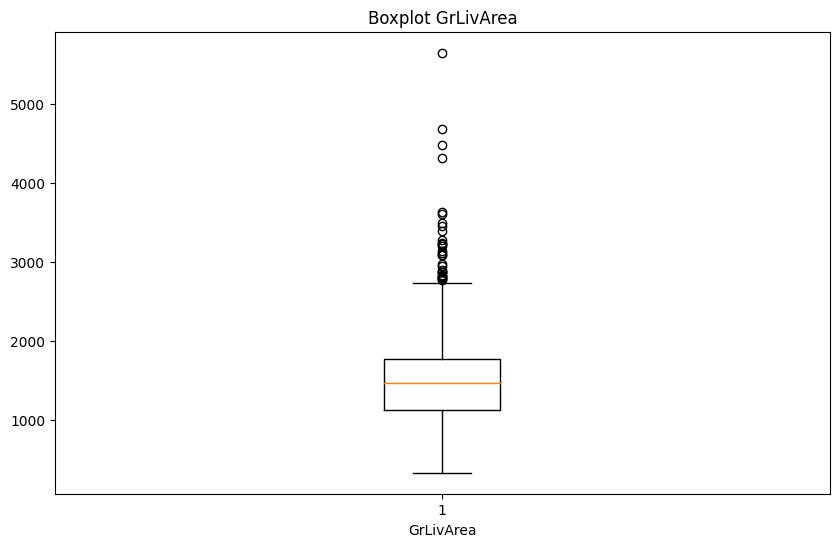

In [38]:
# Boxplot pro 'GrLivArea'
plt.figure(figsize=(10, 6))
plt.boxplot(data['GrLivArea'].dropna(), vert=True)
plt.title('Boxplot GrLivArea')
plt.xlabel('GrLivArea')
plt.show()

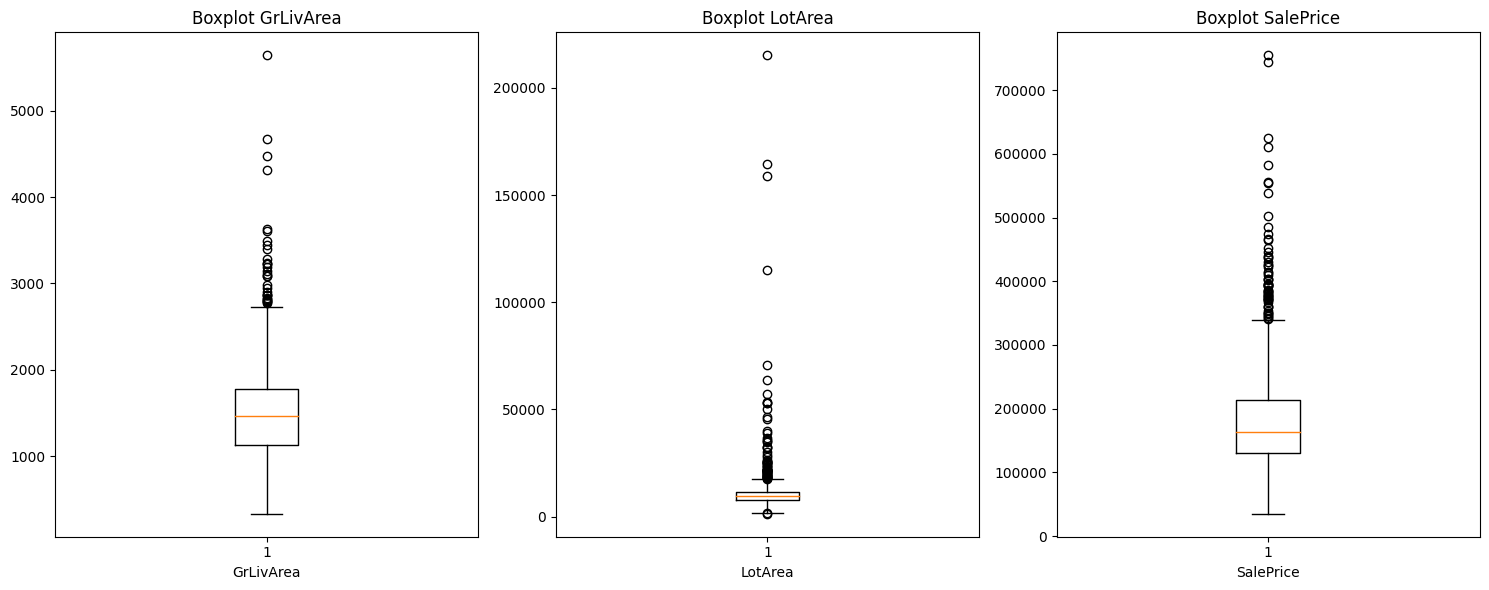

In [41]:
# Boxploty pro 'GrLivArea', 'LotArea' a 'SalePrice'
plt.figure(figsize=(15, 6))

# Vytvoření boxplotů
plt.subplot(1, 3, 1)
plt.boxplot(data['GrLivArea'].dropna(), vert=True)
plt.title('Boxplot GrLivArea')
plt.xlabel('GrLivArea')

plt.subplot(1, 3, 2)
plt.boxplot(data['LotArea'].dropna(), vert=True)
plt.title('Boxplot LotArea')
plt.xlabel('LotArea')

plt.subplot(1, 3, 3)
plt.boxplot(data['SalePrice'].dropna(), vert=True)
plt.title('Boxplot SalePrice')
plt.xlabel('SalePrice')

plt.tight_layout()
plt.show()

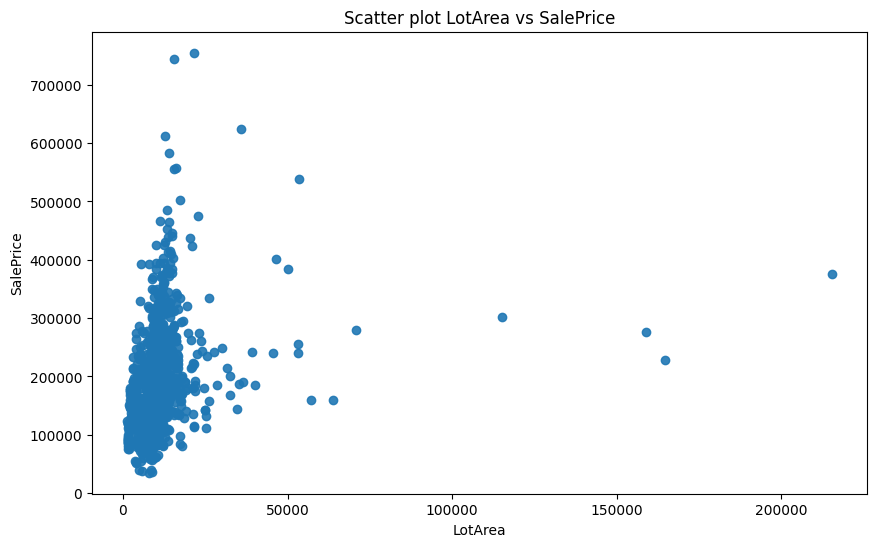

In [42]:
# Scatter plot pro 'LotArea' vs 'SalePrice'
plt.figure(figsize=(10, 6))
plt.scatter(data['LotArea'], data['SalePrice'], alpha=0.9)
plt.title('Scatter plot LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

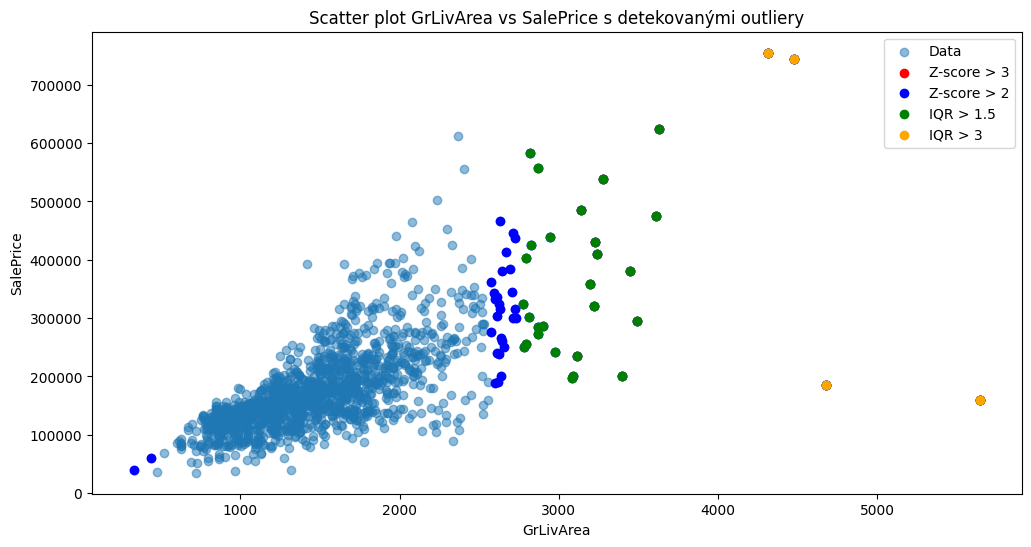

In [45]:
# Funkce pro detekci outlierů pomocí Z-skóre
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers, z_scores

# Funkce pro detekci outlierů pomocí IQR
def detect_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detekce outlierů s různými prahovými hodnotami
outliers_zscore_3, z_scores_3 = detect_outliers_zscore(data, 'GrLivArea', threshold=3)
outliers_zscore_2, z_scores_2 = detect_outliers_zscore(data, 'GrLivArea', threshold=2)

outliers_iqr_1_5 = detect_outliers_iqr(data, 'GrLivArea', factor=1.5)
outliers_iqr_3 = detect_outliers_iqr(data, 'GrLivArea', factor=3)

# Vizualizace pomocí scatter plotu
plt.figure(figsize=(12, 6))

plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.5, label='Data')
plt.scatter(outliers_zscore_3['GrLivArea'], outliers_zscore_3['SalePrice'], color='red', label='Z-score > 3')
plt.scatter(outliers_zscore_2['GrLivArea'], outliers_zscore_2['SalePrice'], color='blue', label='Z-score > 2')
plt.scatter(outliers_iqr_1_5['GrLivArea'], outliers_iqr_1_5['SalePrice'], color='green', label='IQR > 1.5')
plt.scatter(outliers_iqr_3['GrLivArea'], outliers_iqr_3['SalePrice'], color='orange', label='IQR > 3')

plt.title('Scatter plot GrLivArea vs SalePrice s detekovanými outliery')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


### 5. Standardizace dat

- Min-Max Scaling: Transformuje data na nový rozsah (např. 0-1), citlivé na outliery.
 - Z-Score Standardization: Transformuje data tak, aby měla průměr 0 a směrodatnou odchylku 1, robustnější vůči outlierům.

- Zadání: Napište funkci, která standardizuje data ve vybraných sloupcích pomocí Z-skóre.

## Řešení níže

In [62]:
def standardize_data(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

In [63]:
df = standardize_data(data, ['LotFrontage', 'LotArea'])
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0   1          60       RL    -0.239024 -0.207142   Pave   NaN      Reg   
1   2          20       RL     0.405027 -0.091886   Pave   NaN      Reg   
2   3          60       RL    -0.110214  0.073480   Pave   NaN      IR1   
3   4          70       RL    -0.453708 -0.096897   Pave   NaN      IR1   
4   5          60       RL     0.576774  0.375148   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008       

## 6 One-Hot Encoding kategoriálních dat

**Zadání:**
- Napište funkci, která zakóduje (na 0 a 1) kategoriální sloupce pomocí One-Hot Encoding.

**Vysvětlení:**
- Představíme koncept One-Hot Encoding a proč je důležitý pro práci s kategoriálními daty.
- Ukážeme, jak používat metodu `get_dummies` v pandas.


In [66]:
def one_hot_encode(df, columns):
    return pd.get_dummies(df, columns=columns)

df = one_hot_encode(data, ['Neighborhood', 'SaleCondition'])
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0   1          60       RL    -0.239024 -0.207142   Pave   NaN      Reg   
1   2          20       RL     0.405027 -0.091886   Pave   NaN      Reg   
2   3          60       RL    -0.110214  0.073480   Pave   NaN      IR1   
3   4          70       RL    -0.453708 -0.096897   Pave   NaN      IR1   
4   5          60       RL     0.576774  0.375148   Pave   NaN      IR1   

  LandContour Utilities  ... Neighborhood_Somerst Neighborhood_StoneBr  \
0         Lvl    AllPub  ...                    0                    0   
1         Lvl    AllPub  ...                    0                    0   
2         Lvl    AllPub  ...                    0                    0   
3         Lvl    AllPub  ...                    0                    0   
4         Lvl    AllPub  ...                    0                    0   

  Neighborhood_Timber Neighborhood_Veenker SaleCondition_Abnorml  \
0                   0               

In [ ]:
domacak